# Marketing Campaign Analysis


**About this project**.  
This project presents exploratory data analysis of different customer groups and their responce to marketing campaigns launched by food delivery company.

 
**About data**.  
This dataset is publicly available on [GitHub](<https://github.com/nailson/ifood-data-business-analyst-test>)  and is used as a test for hiring Data Analysts.
Dataset consist of 2205 rows and 39 columns.


**Business context**.   
A well-established company operating in the retail food sector. The company has
around several hundred thousands of registered customers and serve almost one million
consumers a year. It sell products from 5 major categories: wines, rare meat products, exotic
fruits, specially prepared fish and sweet products. These categories can further be divided into gold and
regular products. The customers can order and acquire products through 3 sales channels: physical
stores, catalogs and company’s website. The company had solid revenues and a healthy
bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not
promising. For this reason, several strategic initiatives are being considered to invert this
situation.



**Business task** of this case study is to improve the performance of marketing activities of the company with a special focus on marketing campaigns.

**Key Objectives:**

1. Explore the data and provide insights, define cause and effect. Provide a better understanding of the characteristic features of respondents.

2. Propose and describe a customer segmentation based on customers behaviors.

3. Visualize data and provide written reasoning behind discoveries.


In [1]:
# Setting the environment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# loading dataset

food = pd.read_csv('/Users/olexiyshulga/Desktop/Data Analytics/Alex Freberg /Pandas for Data Analysis/project_2_Food_Marketing/u_food_marketing.csv')
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
pd.set_option('display.max.columns', 40)
pd.set_option('display.max.rows', 2300)

In [3]:
food.shape

(2205, 39)

## 1. Data Cleaning and Pre-processing

In [4]:
# Removing duplicates 

food.drop_duplicates(keep = False, inplace = True)

In [5]:
# 362 duplicated rows were removed

food.shape

(1843, 39)

In [6]:
# Combing columns with kids and teens to reflect total number of children in a family


food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis = 1)

In [7]:
# Combing columns with different Marital Status in one column for the purpose of analysis

food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [8]:
food['Marital_Status'] = food[['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']].sum(axis = 1)

In [165]:
# Creating addtional column 'Marital_Status_str' for future aggregations

food['marital_Status_str'] = food['Marital_Status'].map({5:'Divoreced', 4: 'Married', 3: 'Single', 2: 'Together', 1:'Widow'})

In [10]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [11]:
# Combing columns with different level of education in one column for the purpose of analysis

food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [12]:
food['Education_Level'] = food[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].sum(axis = 1)

In [13]:
# Creating addtional column 'Education_Level_str' for future aggregations

food['Education_Level_str'] = food['Education_Level'].map({5:'PhD', 4: 'Master', 3: 'Grad', 2: 'Basic', 1:'2n_Cylce'})


In [14]:
# Combining all accepted campaign data into one column

food['Accepted_Campaigns'] = food[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']].sum(axis = 1)


In [15]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] !=0).astype(int)

## 2 . Exploratory Analysis
### 2.1. Finding correlations between Campaign Acceptance and other metrics

In [16]:
food.corr(method = 'spearman',numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)


Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.824678
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.360283
MntTotal                0.354353
NumCatalogPurchases     0.347984
MntRegularProds         0.335179
Income                  0.286690
MntMeatProducts         0.286007
NumWebPurchases         0.249472
MntGoldProds            0.246490
AcceptedCmp2            0.174619
MntFruits               0.157641
NumStorePurchases       0.152569
MntSweetProducts        0.151525
MntFishProducts         0.126918
Customer_Days           0.083598
Education_Level         0.062408
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.015997
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021898
marital_To

In [17]:
food_1 = food.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

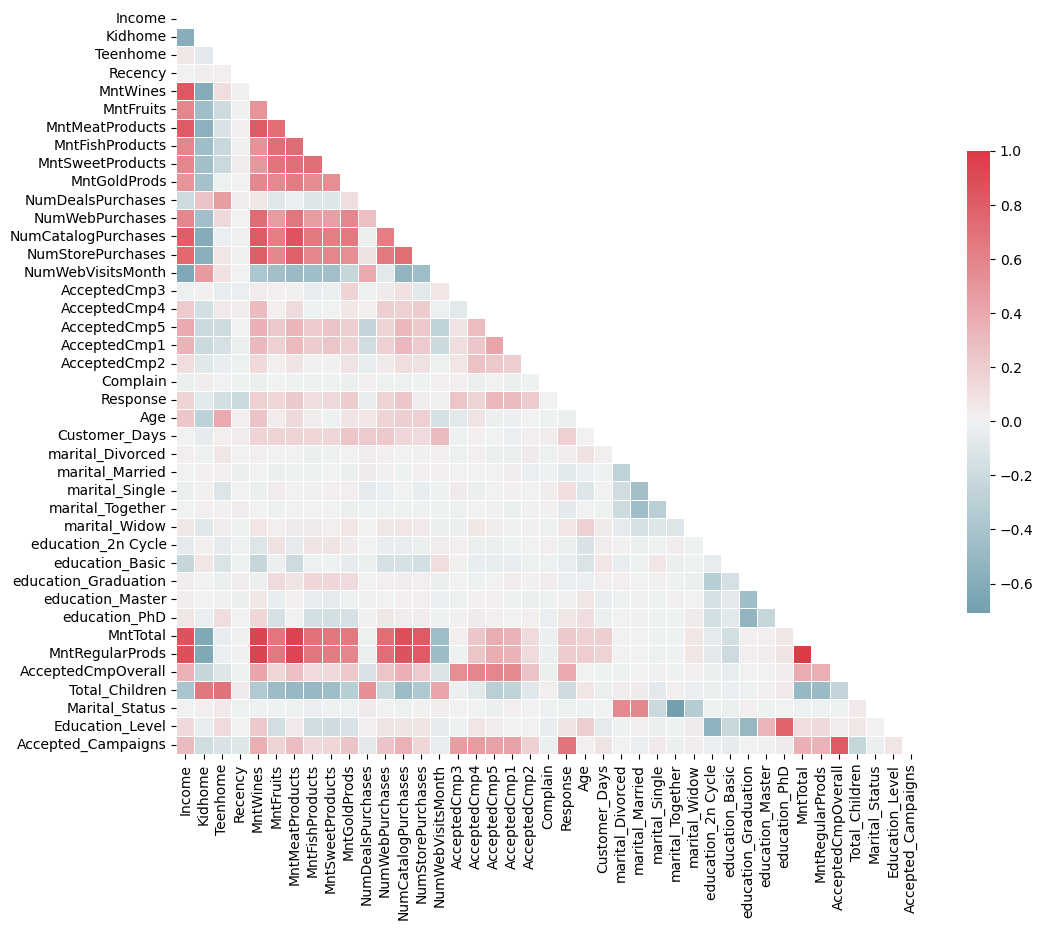

In [19]:
import numpy as np

mask = np.triu(np.ones_like(food_1.corr(numeric_only = True)))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(12,12))

sns.heatmap(food_1.corr(method = 'spearman', numeric_only = True), mask=mask, cmap=cmap, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### 2.2. Customer Segmentation by Age

In [20]:
age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return("Unknown")
    
food['Age_Group'] = food['Age'].apply(assign_age_group)


In [21]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,marital_Status_str,Education_Level,Education_Level_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Sinlge,3,Grad,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Sinlge,3,Grad,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Grad,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Grad,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31 - 40


In [22]:
food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


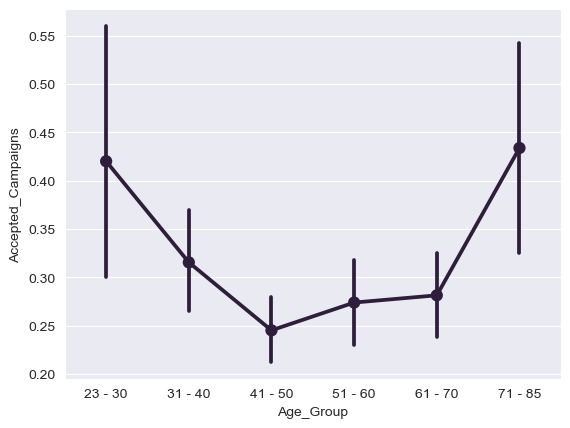

In [190]:
# Overall Campaign Acceptance Rate among customers of different age groups

age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']

sns.pointplot(data = food, x ='Age_Group', y = 'Accepted_Campaigns', order = age_order)
plt.show()

In [24]:
counts = food['Age_Group'].value_counts()
counts

Age_Group
41 - 50    612
51 - 60    409
61 - 70    391
31 - 40    298
71 - 85     83
23 - 30     50
Name: count, dtype: int64

In [225]:
percentage = counts / food.shape[0] * 100
percent_food = percentage.reset_index()

In [226]:
percent_food.columns = ['age_group','percentage']
percent_food = percent_food.sort_values('age_group')
percent_food

,age_group,percentage
5,23 - 30,2.712968
3,31 - 40,16.169289
0,41 - 50,33.206728
1,51 - 60,22.192078
2,61 - 70,21.215410
4,71 - 85,4.503527


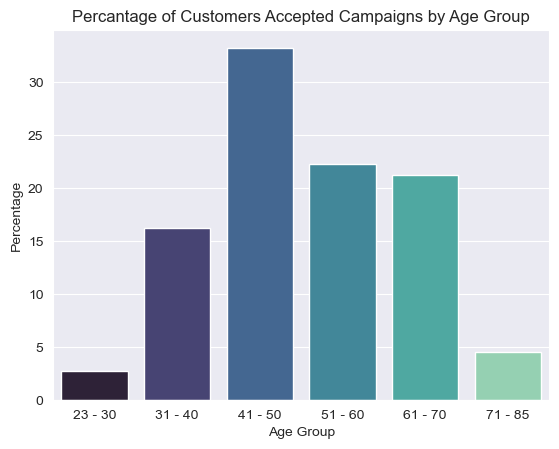

In [227]:
sns.set_palette("mako")

sns.barplot(data = percent_food, x = 'age_group', y = 'percentage')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

plt.title('Percentage of Customers Accepted Campaigns by Age Group')
plt.show()

### 2.3. Customer Segmentation by Amount Spent and Income

In [30]:
food.groupby('Age_Group')['MntTotal'].sum().reset_index()

,Age_Group,MntTotal
0,23 - 30,40166
1,31 - 40,135044
2,41 - 50,297347
3,51 - 60,242313
4,61 - 70,249793
5,71 - 85,76828


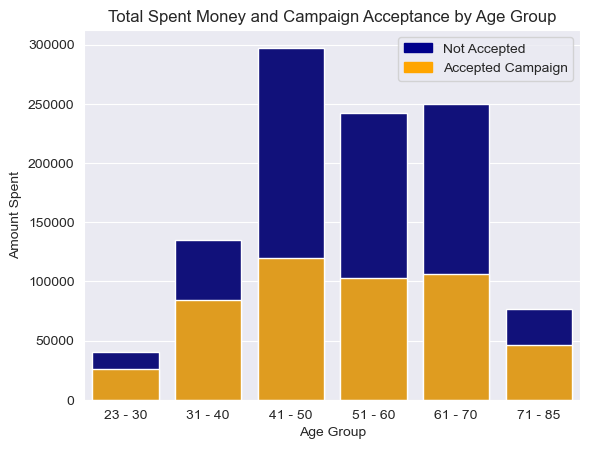

In [223]:
import matplotlib.patches as mpatches

# top bar ->  to find y position of the bars
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

# bar chart 1 -> top bars (group of 'Not accepted campaign')
bar1 = sns.barplot(x = 'Age_Group',  y = 'MntTotal', data = grouped_food, color='darkblue')


# bottom bar ->  take only Accepted Campaign values from the data
acct_cmp = food[food['Accepted_Campaigns'] !=0 ].sort_values('Age_Group')

# bar chart 2 -> bottom bars (group of 'Accepted Campaign = 1')
bar2 = sns.barplot(x= 'Age_Group', y = 'MntTotal', data = acct_cmp, estimator = sum, errorbar=None,  color='orange')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Not Accepted')
bottom_bar = mpatches.Patch(color='orange', label='Accepted Campaign')
plt.title('Total Spent Money and Campaign Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Amount Spent')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()


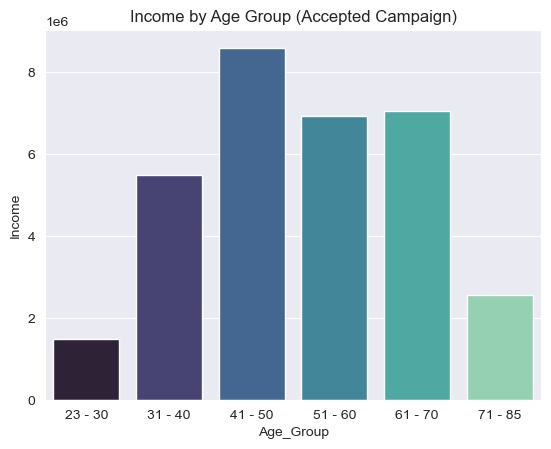

In [189]:
acct_cmp = food[food['Accepted_Campaigns'] != 0 ]

grouped_food = acct_cmp.groupby('Age_Group')['Income'].sum().reset_index()

sns.barplot(data = grouped_food, x = 'Age_Group', y = 'Income')
plt.title('Income by Age Group (Accepted Campaign)')
plt.show()

In [33]:
# Age Segmentation - core audiecnce for accepting campaing is  341 to 70 years old since  these categories spent more and have higher annual income.
# 23-40 and 71+ accept at a higher rate.

### 2.4. Segmentation by Purchase Type

In [88]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])


In [89]:
sum_food = sum_food.reset_index()

In [90]:
sum_food.rename(columns = {'index': 'Purchase_Type'}, inplace = True)
sum_food

,Purchase_Type,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


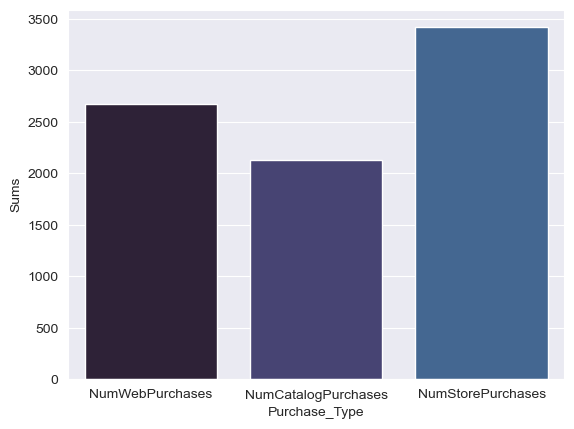

In [191]:
sns.barplot(x = 'Purchase_Type', y = 'Sums', data = sum_food)

plt.show()

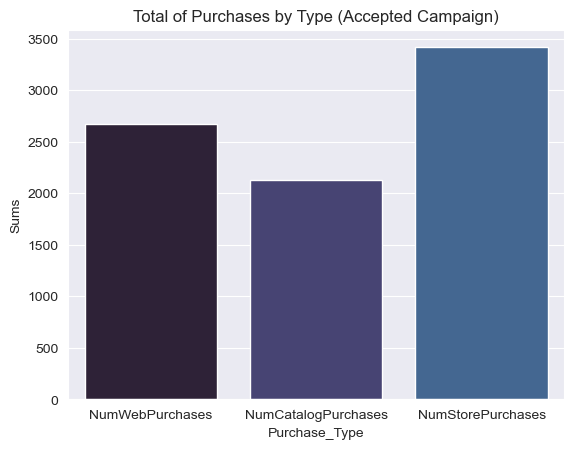

In [145]:
acct_cmp = food[food['Accepted_Campaigns'] !=0 ]

sum_food = pd.DataFrame(acct_cmp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index': 'Purchase_Type'}, inplace = True)
sns.barplot(x = 'Purchase_Type', y = 'Sums', data = sum_food)

plt.title('Total of Purchases by Type (Accepted Campaign)')
plt.show()

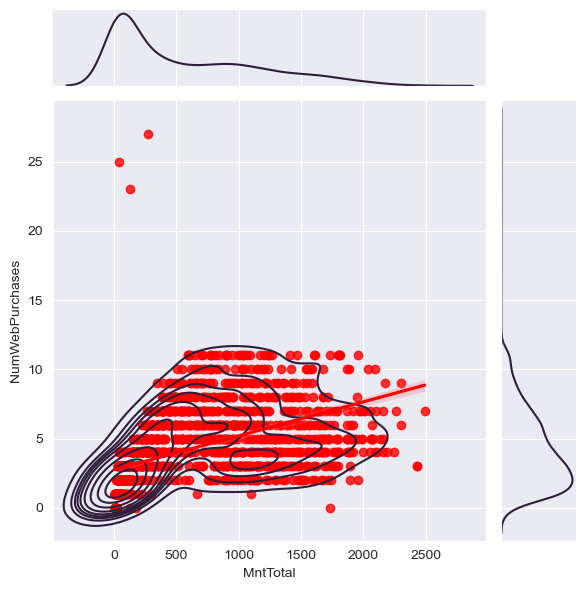

In [220]:
# Amount Spend vs Number of Purchases (Web)

x = sns.jointplot(data =  food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')
plt.show()

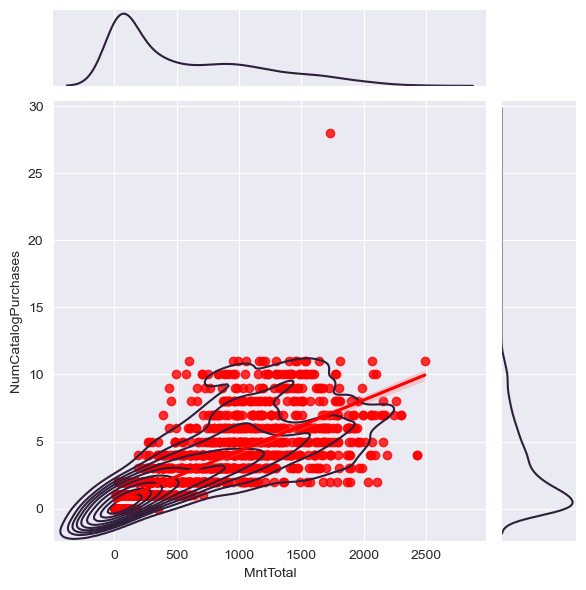

In [221]:
# Amount Spend vs Number of Purchases (Catalog)

x = sns.jointplot(data =  food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')
plt.show()

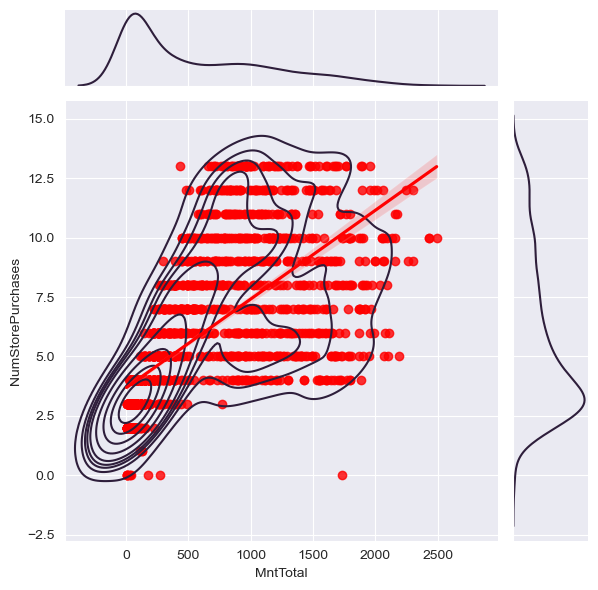

In [222]:
# Amount Spend vs Number of Purchases (In Store)

x = sns.jointplot(data =  food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')
x.plot_joint(sns.regplot, color = 'red')
plt.show()

In [ ]:
# 2 potential directions: boost up higher percentage catalog customers.
# OR focus in In-store/Web because they have more traffic. 

### 2.5. Segmentation by Family size

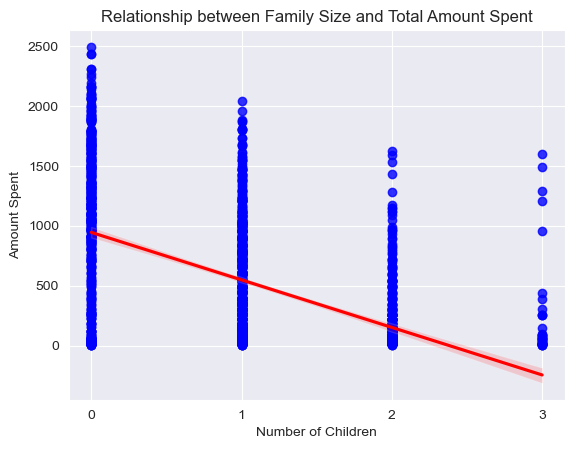

In [218]:
sns.regplot(x ='Total_Children', y = 'MntTotal', data = food, color = 'blue', line_kws = {'color': 'red'})

plt.title('Relationship between Family Size and Total Amount Spent')
plt.ylabel('Amount Spent')
plt.xticks(np.arange(0, 4, 1)) 
plt.xlabel('Number of Children')


plt.show()

In [ ]:
# Less kid = more likely spent more money

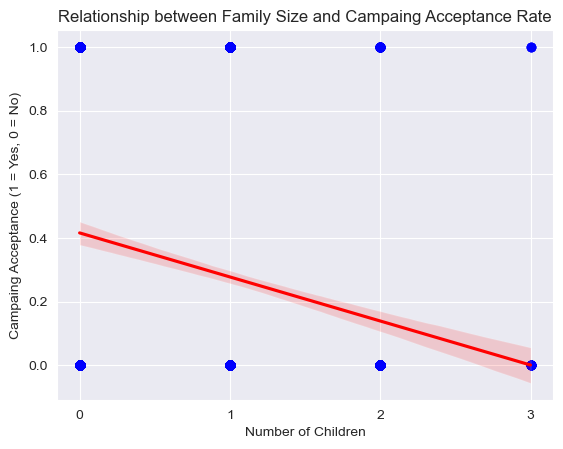

In [216]:
sns.regplot(x ='Total_Children', y = 'Accepted_Campaigns', data = food, color = 'blue',line_kws = {'color': 'red'})
plt.xticks(np.arange(0, 4, 1))
plt.title('Relationship between Family Size and Campaing Acceptance Rate')
plt.xlabel('Number of Children')
plt.ylabel('Campaing Acceptance (1 = Yes, 0 = No)')
plt.show()

In [ ]:
# Less kid = more likely to accept campaign

### 2.6. Segmentation by Level of Education

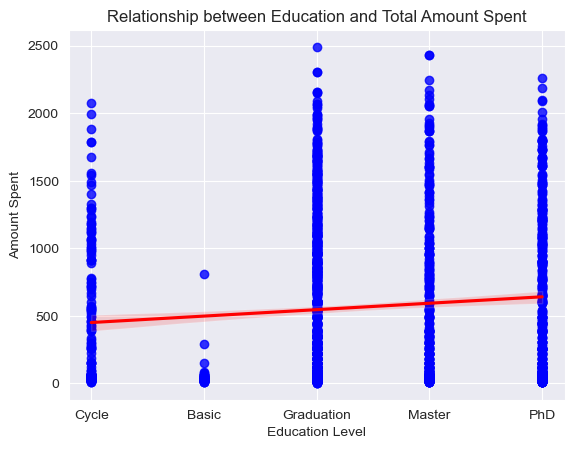

In [213]:
ed = sns.regplot(x ='Education_Level', y = 'MntTotal', data = food, color = 'blue',line_kws = {'color': 'red'})
plt.xticks(np.arange(1, 6, 1))
ed_level = ['Cycle','Basic','Graduation','Master','PhD']
ed.set_xticklabels(ed_level)
plt.xlabel('Education Level')
plt.ylabel('Amount Spent')
plt.title('Relationship between Education and Total Amount Spent')

plt.show()

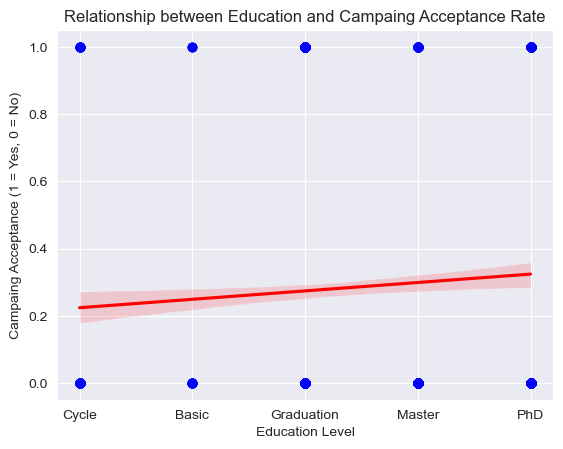

In [211]:
ed = sns.regplot(x ='Education_Level', y = 'Accepted_Campaigns', data = food, color = 'blue',line_kws = {'color': 'red'})
plt.xticks(np.arange(1, 6, 1))
ed_level = ['Cycle','Basic','Graduation','Master','PhD']
ed.set_xticklabels(ed_level)
plt.xlabel('Education Level')
plt.ylabel('Campaing Acceptance (1 = Yes, 0 = No)')
plt.title('Relationship between Education and Campaing Acceptance Rate')

plt.show()

In [ ]:
# Education is not a significant indicator of campaign acceptance in our segmentation.

### 2.7. Segmentation by Marital Status

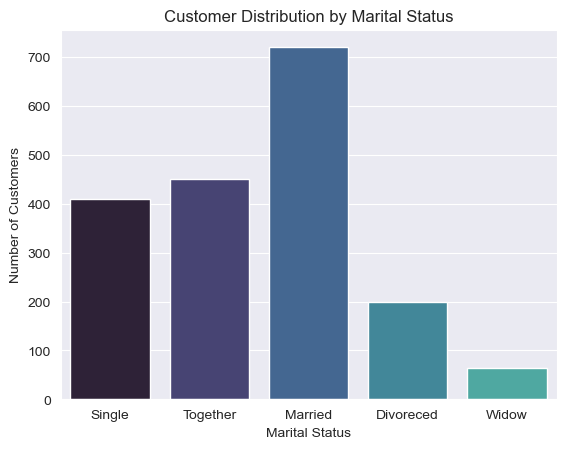

In [185]:
food.sort_values('marital_Status_str', ascending = False)
sns.countplot(x = 'marital_Status_str', data = food)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

plt.title('Customer Distribution by Marital Status')
plt.show()

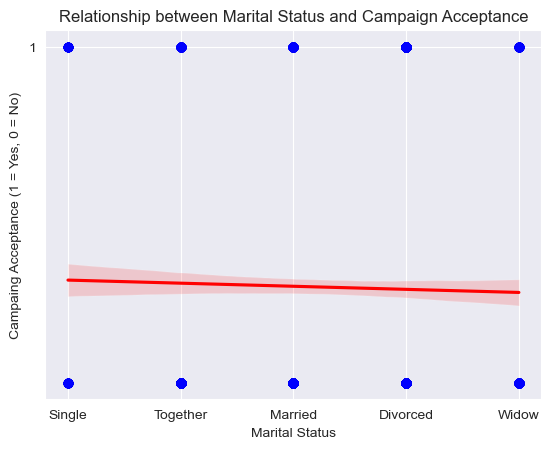

In [173]:
m = sns.regplot(x = 'Marital_Status', y = 'Accepted_Campaigns', data = food, color = 'blue',line_kws = {'color': 'red'})
plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(1, 2, 1))
mr = ['Single','Together','Married','Divorced','Widow']
m.set_xticklabels(mr)
plt.xlabel('Marital Status')
plt.ylabel('Campaing Acceptance (1 = Yes, 0 = No)')
plt.title('Relationship between Marital Status and Campaign Acceptance')

plt.show()

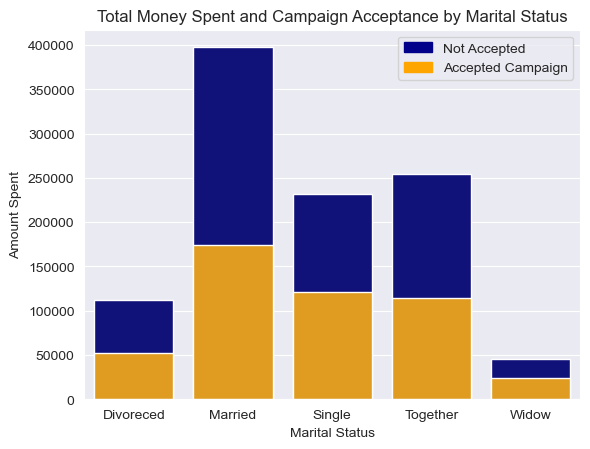

In [209]:
rel_food = food.groupby('marital_Status_str')['MntTotal'].sum().reset_index()

bar1 = sns.barplot(x = 'marital_Status_str', y ='MntTotal', data = rel_food, color='darkblue')

acct_cp = food[food['Accepted_Campaigns'] !=0 ]
rel_food1 = acct_cp.groupby('marital_Status_str')['MntTotal'].sum().reset_index()

bar2 = sns.barplot(x = 'marital_Status_str', y ='MntTotal', data = rel_food1,color='orange')

top_bar = mpatches.Patch(color='darkblue', label='Not Accepted')
bottom_bar = mpatches.Patch(color='orange', label='Accepted Campaign')
plt.title('Total Money Spent and Campaign Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

In [194]:
total = food['marital_Status_str'].value_counts()
acct = food[food['Accepted_Campaigns'] == 1]['marital_Status_str'].value_counts()

In [204]:
pct_mar = round(acct / total * 100, 2)

In [205]:
percent_food = pct_mar.reset_index()
percent_food.columns = ['Marital_Status', 'Percentage']
percent_food

,Marital_Status,Percentage
0,Divoreced,28.64
1,Married,26.11
2,Single,32.76
3,Together,26.61
4,Widow,37.50


In [210]:
# Marital Status doesn't relate to Campaign Acceptance Rate. 
# Married, Single, Together groups are spending significanrly more money that widow and divorced.
# We should focus on this segment.

## SUMMARY FINDINGS

 1.  Customers age range between 41 and 70 years old were spending more money, but less likely to accept campaigns. This segment represents higher volume of sales and higher annual income.

2. Catalog purchases was more likely to accept campaigns, but in person spent more. Recommend a split between all:
  - 40% catalog - 30% store -  30% web
  
3. Focus on small family size customers (families with less kids).

4. Education has no significant impact on campaign acceptance rate. No need to targed that category.

5. Marital status doesn't play a crucial part as well. But worth to note that Married, Single and Toghether spent more money.


### Drive-Profit Recommendations: 
Audience - middle age people, high earners, with no kids.  Target on different platforms with split mentioned above.


### New Users to Reach out:
- Focus on 21-30 years old and 70+ customers who statistically accepted at a higher rate.

 
 
 

